# To begin with
Please download the data with Taipei from Inside Airbnb first.<br>
Let's first look into the data to pick up columns of interest to predict the price for a place before you become a host.


In [1375]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./listings.csv')
pd.set_option('display.max_columns', None) ## to see all columns in the data
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,74641,https://www.airbnb.com/rooms/74641,20201030035535,2020-10-30,黑白雙人房@南京復興站。小巨蛋斜對面。溫泉式浴缸。,"私人衛浴大套房,距南京復興站走路2分鐘。面對7-11便利商店,旁邊就是南京微風百貨和IKEA...",This area is what we called Business & Residen...,https://a0.muscache.com/pictures/10787933/fa20...,393116,https://www.airbnb.com/users/show/393116,Yi-Wan,2011-02-15,Taipei,I carve small wooden objects by hand tools & s...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/393116/profil...,https://a0.muscache.com/im/users/393116/profil...,Songshan,4,4,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Songshan District, Taipei, Taiwan",松山區,NaN,25.05159,121.54747,Private room in guest suite,Private room,3,NaN,1 private bath,1.0,1.0,"[""Iron"", ""Paid parking off premises"", ""TV"", ""S...","$1,429.00",3,28,3,3,28,28,3.0,28.0,NaN,t,28,58,88,88,2020-10-30,49,1,0,2011-11-20,2020-01-02,88.0,9.0,9.0,9.0,10.0,9.0,9.0,NaN,f,4,0,4,0,0.45
1,74643,https://www.airbnb.com/rooms/74643,20201030035535,2020-10-30,小巨蛋。南京復興站溫馨套房,"小巨蛋對面，距南京復興站走路2分鐘。面對7-11便利商店,旁邊就是南京微風百貨；私人衛浴套房...",微風南京，台北小巨蛋。<br />南京復興捷運站，兄弟飯店，文華飯店。,https://a0.muscache.com/pictures/10794157/4b52...,393116,https://www.airbnb.com/users/show/393116,Yi-Wan,2011-02-15,Taipei,I carve small wooden objects by hand tools & s...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/393116/profil...,https://a0.muscache.com/im/users/393116/profil...,Songshan,4,4,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Songshan District, Taiwan",中山區,NaN,25.04939,121.54352,Private room in guest suite,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Long term stays allowed"", ""Hangers"", ""Heatin...","$1,429.00",3,365,3,3,365,365,3.0,365.0,NaN,t,30,60,86,86,2020-10-30,52,1,0,2011-04-05,2019-12-31,94.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,4,0,4,0,0.45
2,178036,https://www.airbnb.com/rooms/178036,20201030035535,2020-10-30,單人床位 Single bunk bed [mixed dorm for 4pax],Hello from Taipei :)<br />We are located at Z...,Local food within 5 mins walk<br />6 mins walk...,https://a0.muscache.com/pictures/1263b356-1513...,851825,https://www.airbnb.com/users/show/851825,TaipeiTaipei Hostel,2011-07-21,"Da’an District, Taipei City, Taiwan",Hello :D\nThis is Taipei Taipei Team!\nWe are ...,within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/c9e25...,https://a0.muscache.com/im/pictures/user/c9e25...,Zhongzheng,9,9,"['email', 'phone', 'facebook', 'reviews']",t,t,"Zhongzheng District, Taipei, Taiwan",中正區,NaN,25.04446,121.51346,Room in hostel,Hotel room,1,NaN,4 baths,1.0,4.0,"[""Room-darkening shades"", ""Breakfast"", ""Shampo...",$597.00,1,90,1,2,90,90,1.3,90.0,NaN,t,29,59,84,359,2020-10-30,80,9,0,2011-07-30,2020-09-14,92.0,9.0,9.0,10.0,10.0,10.0,10.0,NaN,t,8,0,1,1,0.71
3,2717

# Location
Location is the main factor to affect the price of your place.
So, let's have a look at subsets of **neighbourhood_cleansed** with **price**.


## Clean the data
Replace Mandarin with English allowing more people to better understand our analysis.

In [1376]:
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('中正區', 'Zhongzheng')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('大同區', 'Datong')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('中山區', 'Zhongshan')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('松山區', 'Songshan')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('大安區', "Da'an")
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('萬華區', 'Wanhua')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('信義區', 'Xinyi')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('士林區', 'Shilin')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('北投區', 'Beitou')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('內湖區', 'Neihu')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('南港區', 'Nangang')
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].replace('文山區', 'Wenshan')
df.shape

(5431, 74)

[Text(0, 0.5, 'Number of hosts'), Text(0.5, 0, 'Location')]

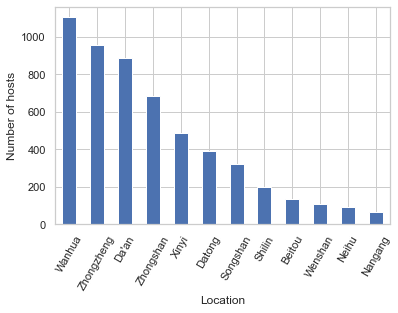

In [1377]:
loc_counts = df['neighbourhood_cleansed'].value_counts()
loc_plot = loc_counts.plot(kind='bar', rot=60)
loc_plot.set(xlabel="Location", ylabel="Number of hosts")

Check out the average price of each district.

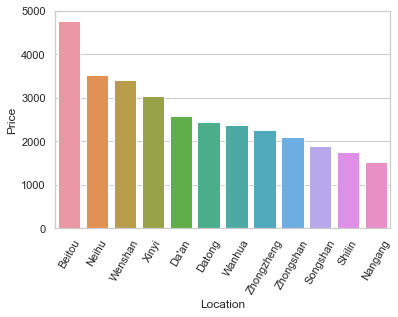

In [1378]:
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df['price'] = df['price'].astype('int')
x = pd.DataFrame(df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False))

x = x.reset_index()
sns.set(style="whitegrid")
sns.barplot(x = 'neighbourhood_cleansed',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

# Type of room

The type of property is one of the main factors to affect the price of a place. However, Taipei is a small city so most places hosting on Airbnb are kinds of rooms so we prefer to use **room_type** instead of **property_type** for further analysis.

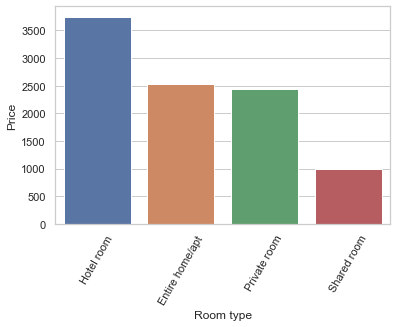

In [1379]:
x = pd.DataFrame(df.groupby('room_type')['price'].mean().sort_values(ascending=False))
x = x.reset_index()

sns.barplot(x = 'room_type',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()

Also, what types of rooms distribute to each of the districts.

Text(0, 0.5, 'Number of rooms')

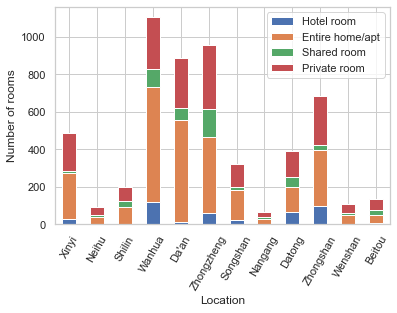

In [1380]:
room_type_count = df.groupby('neighbourhood_cleansed')['room_type'].value_counts()
sorted_data = []
listed_loc = list(set(df['neighbourhood_cleansed']))
listed_room_type = list(set(df['room_type']))
for loc in listed_loc:
    types = []
    for room in listed_room_type:
        try:
            types.append(room_type_count[loc][room])
        except:
            types.append(0)
    sorted_data.append(types)
sorted_data
ax = pd.DataFrame(data=sorted_data, index=listed_loc, columns=listed_room_type)
ax.plot.bar(stacked=True, rot=60)
plt.xlabel('Location')
plt.ylabel('Number of rooms')

# Price Pridiction
First things first, we assume the following factors in the data below may influence the price of a place.<br>

**neighbourhood_cleansed<br>
host_listings_count<br>
room_type<br>
accommodates<br>
bathrooms_text<br>
bedrooms<br>
beds<br>
amenities<br>
price**<br>

In [1381]:
#Therefore, we only put the columns we choose into our df,
picked_df = df[['beds', 'bedrooms', 'bathrooms_text',
                'host_listings_count', 'accommodates',
                'amenities', 'neighbourhood_cleansed',
                'room_type', 'price']]

## Clean the data....


Convert string to float to count how many bath rooms of that place.

In [1382]:
for i, text in enumerate(picked_df['bathrooms_text']):
    try:
        text = text.split(' ')[0]
        if text == 'Shared' or text == 'Half-bath':
            picked_df['bathrooms_text'][i] = 0.5
        else:
            picked_df['bathrooms_text'][i] = float(text)
    except:
        picked_df['bathrooms_text'][i] = 1.0
        
picked_df['bathrooms'] = picked_df['bathrooms_text'].astype('float')
picked_df.drop(['bathrooms_text'], axis=1, inplace=True)

<ipython-input-1382-ef9d2535a468>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_df['bathrooms_text'][i] = float(text)
C:\Users\A40471\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-1382-ef9d2535a468>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_df['bathrooms_text'][i] = 1.0
<ipython-inp

List every single amenity from the data.

In [1383]:
picked_df['amenities'] = picked_df['amenities'].replace('["]', '', regex=True)

list_amenities = []
unique_amenities = set()
for amenities in picked_df['amenities']:
    amenities = amenities[1:-1].split(',')
    temp = []
    for amenity in amenities:
        amenity = amenity.strip(' ')
        if amenity == '':
            continue
        temp.append(amenity)
        unique_amenities.add(amenity)
    list_amenities.append(temp)
    
picked_df['amenities'] = list_amenities
for amenity in unique_amenities:
    picked_df[amenity] = picked_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

picked_df['num_amenities'] = picked_df['amenities'].apply(lambda x: len(x))

picked_df.drop(['amenities'], axis=1, inplace=True)

<ipython-input-1383-523bc2127371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_df['amenities'] = picked_df['amenities'].replace('["]', '', regex=True)
<ipython-input-1383-523bc2127371>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  picked_df['amenities'] = list_amenities
<ipython-input-1383-523bc2127371>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Fill nan in the columns with the mean for numerical variables and dummies for objects.

In [1384]:
## Fill any nan in the columns included float with the mean of that column
num_vars = picked_df.select_dtypes(include=['float']).columns
for col in num_vars:
    picked_df[col].fillna(picked_df[col].mean(), inplace=True)
    
## Encode every categorical variable
cat_vars = picked_df.select_dtypes(include=['object'])
dummies = pd.get_dummies(cat_vars)

for var in cat_vars:
    picked_df.drop([var], axis=1, inplace=True)

picked_df = pd.concat([picked_df, dummies], axis=1, sort=False)

Normalize the data

In [1385]:
## Convert numerical data from int to float to make sure each of them can be normalized later
## Hint: Do not normalize catogories.
picked_df['host_listings_count'] = picked_df['host_listings_count'].astype('float')
picked_df['accommodates'] = picked_df['accommodates'].astype('float')
picked_df['price'] = picked_df['price'].astype('float')

num_vars = picked_df.select_dtypes(include=['float']).columns
names = num_vars
scaled_df = pd.DataFrame(preprocessing.normalize(picked_df[num_vars]), columns=names)
picked_df.drop(num_vars, axis = 1, inplace=True)

picked_df = pd.concat([picked_df, scaled_df], axis=1, sort=False)

Before training, double check what we have in the picked data.


In [1386]:
picked_df

,Host greets you,Sound system,Window guards,Elevator,Hangers,Beachfront,Induction stove,Iron,Paid parking garage on premises,Oven,First aid kit,Beach essentials,Lockbox,Room-darkening shades,Mini fridge,Smoke alarm,Rice Maker,Paid parking garage on premises \u2013 1 space,Gym,Private living room,Cable TV,YAMAHA sound system with aux,Free street parking,Hot water,Portable fans,Window AC unit,Baking sheet,Baby bath,Free driveway parking on premises \u2013 1 space,Pour Over Coffee,Heating,Bluetooth sound system,Garden or backyard,Paid parking lot off premises,Air conditioning,Freezer,Trash compactor,Teco refrigerator,Paid parking on premises,Dishwasher,Ceiling fan,Baby monitor,TV,Nespresso machine,Game console,Washer \u2013\u00a0In building,Chromecast,Kitchen,Children\u2019s dinnerware,44\ HDTV with standard cable,cherry gas stove,Keypad,Shampoo,Dryer \u2013\u00a0In unit,Free parking on premises,Stove,Pack \u2019n Play/travel crib,Bathtub,Children\u2019s books and toys,EV charger,Washer,Babysitter recommendations,50\ HDTV with standard cable,Paid street parking off premises,Stair gates,Coffee maker,Crib,Private entrance,Wifi \u2013 100 Mbps,Table corner guards,Dryer,Breakfast,Hot tub,Barbecue utensils,Bread maker,premium cable,Shower gel,36\ HDTV with standard cable,HITACHI refrigerator,Refrigerator,Lake access,Outlet covers,Luggage dropoff allowed,Wifi \u2013 40 Mbps,HDTV with standard cable,Conditioner,Dryer \u2013 In building,42\ HDTV with premium cable,Wifi,Smart lock,Building staff,Laundromat nearby,Paid parking garage on premises \u2013 8 spaces,Paid parking off premises,Cleaning before checkout,Waterfront,BOSE sound system,BBQ grill,Microwave,23\ HDTV with Chromecast,Yinghua induction stove,Laptop-friendly workspace,Carbon monoxide alarm,32\ HDTV with premium cable,HDTV with premium cable,Fire extinguisher,Indoor fireplace,Cooking basics,Long term stays allowed,Essentials,Bed linens,standard cable,Piano,Hair dryer,Electric stove,Fireplace guards,Changing table,Patio or balcony,house shampoo,High chair,Pocket wifi,Wifi \u2013 80 Mbps,HDTV with Netflix,Ethernet connection,Lock on bedroom door,Extra pillows and blankets,Dishes and silverware,Paid parking garage off premises,Single level home,Washer \u2013\u00a0In unit,Pool,Body soap,House shampoo,Central air conditioning,Johnson's \u5b0c\u751f shampoo,num_amenities,neighbourhood_cleansed_Beitou,neighbourhood_cleansed_Da'an,neighbourhood_cleansed_Datong,neighbourhood_cleansed_Nangang,neighbourhood_cleansed_Neihu,neighbourhood_cleansed_Shilin,neighbourhood_cleansed_Songshan,neighbourhood_cleansed_Wanhua,neighbourhood_cleansed_Wenshan,neighbourhood_cleansed_Xinyi,neighbourhood_cleansed_Zhongshan,neighbourhood_cleansed_Zhongzheng,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,beds,bedrooms,host_listings_count,accommodates,price,bathrooms
0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.000700,0.000700,0.002799,0.002099,0.999993,0.000700
1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.000700,0.000700,0.002799,0.001400,0.999994,0.001050
2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.006699,0.001675,0.015073,0.001675,0.999839,0.006699
3,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,

# Modeling...


In [1392]:
X = picked_df.drop(['price'], axis=1)
y = picked_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)

print("r2 score on train set: {}".format(r2_score(y_train, y_train_preds)))
print("r2 score on test set: {}".format(r2_score(y_test, y_test_preds)))


r2 score on train set: 0.8319270803449104
r2 score on test set: 0.8423762649525424


Let's see what features influence the price the most.

In [1388]:
coefs_df = pd.DataFrame()

coefs_df['factors'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
# coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df.sort_values('coefs', ascending=False).head(3)

,factors,coefs
153,bedrooms,0.257535
156,bathrooms,0.021371
8,Paid parking garage on premises,0.000528
